In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load, merge, and save datasets
df_eoc = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/checkpoints_eoc.csv')
df_page_views = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/page_views.csv')
merged_df = pd.merge(df_eoc, df_page_views, on='student_id', how='inner')
merged_df.to_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/merged_data.csv', index=False)

df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/merged_data.csv')

# check for inconsistencies
print("Initial Data Summary:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Description:\n", df.describe())

# 3.1 Remove duplicates and handle missing values
data_cleaned = df.drop_duplicates()
data_cleaned = data_cleaned.dropna()

# Get the improvement in data reliability
initial_reliability = (1 - df.isnull().sum().sum() / df.size) * 100
final_reliability = (1 - data_cleaned.isnull().sum().sum() / data_cleaned.size) * 100
print(f"Initial Data Reliability: {initial_reliability:.2f}%")
print(f"Final Data Reliability: {final_reliability:.2f}%")

# Calculate percentage improvement
improvement = ((final_reliability - initial_reliability) / initial_reliability) * 100
print(f"Improvement in Data Reliability: {improvement:.2f}%")

# Save the cleaned dataset
data_cleaned.to_csv('coursekata_cleaned_dataset.csv', index=False)



/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1170/1705075119.py:11: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_page_views = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/page_views.csv')
/var/folders/68/rjzxf9q97tn5x9ykgzdf_bm00000gn/T/ipykernel_1170/1705075119.py:15: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/rujvi/Downloads/Random Sample of Data Files_03_04/merged_data.csv')


Initial Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877354 entries, 0 to 877353
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   student_id          877354 non-null  object 
 1   class_id_x          877354 non-null  object 
 2   chapter_number_x    877354 non-null  int64  
 3   book_x              877354 non-null  object 
 4   EOC                 876064 non-null  float64
 5   n_possible          877354 non-null  int64  
 6   n_correct           877354 non-null  int64  
 7   n_attempt           877354 non-null  int64  
 8   book_y              877354 non-null  object 
 9   release             877354 non-null  object 
 10  chapter             877354 non-null  object 
 11  page                877354 non-null  object 
 12  chapter_number_y    856962 non-null  float64
 13  section_number      856962 non-null  float64
 14  institution_id      877354 non-null  object 
 15  class_id_y  

In [78]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType, FloatType, DoubleType

spark = SparkSession.builder.appName("DataVisualization").getOrCreate()
df = spark.read.csv('/Users/rujvi/Downloads/full_03_04/page_views.csv', header=True, inferSchema=True)
df.printSchema()

# Filter to get only rows where 'book' column equals 'College / Statistics and Data Science (ABC)'
filtered_df = df.filter(df['book'] == 'College / Statistics and Data Science (ABC)')
filtered_df.show()
filtered_df.write.csv('ABC1.csv', header=True, mode='overwrite')
data = spark.read.csv('ABC1.csv', header=True, inferSchema=True)
data.show()

# Group by 'chapter_number' and calculate the mean of 'engaged'
chapter_avg_eoc = data.groupBy('chapter_number').agg(F.mean('engaged').alias('avg_engaged'))
chapter_avg_eng_pandas = chapter_avg_eng.toPandas()

# Convert 'chapter_number' and 'avg_eng' columns to numeric types, coercing any errors
chapter_avg_eng_pandas['chapter_number'] = pd.to_numeric(chapter_avg_eng_pandas['chapter_number'], errors='coerce')
chapter_avg_eng_pandas['avg_engaged'] = pd.to_numeric(chapter_avg_eng_pandas['avg_engaged'], errors='coerce')
chapter_avg_eoc_pandas = chapter_avg_eoc_pandas.dropna()
print(chapter_avg_eng_pandas)


# Calculate Pearson's correlation coefficient (r) and p-value using NumPy
r, p_value = np.corrcoef(chapter_avg_eoc_pandas['chapter_number'], chapter_avg_eoc_pandas['avg_engaged'])[0, 1], 0  # Replace 0 with actual p-value calculation if needed

print("Pearson's correlation coefficient (r):", r)
print("p-value:", p_value)
r_squared = r ** 2

print("R-squared:", r_squared)


root
 |-- book: string (nullable = true)
 |-- release: string (nullable = true)
 |-- chapter: string (nullable = true)
 |-- page: string (nullable = true)
 |-- chapter_number: string (nullable = true)
 |-- section_number: string (nullable = true)
 |-- institution_id: string (nullable = true)
 |-- class_id: string (nullable = true)
 |-- student_id: string (nullable = true)
 |-- dt_accessed: string (nullable = true)
 |-- was_complete: string (nullable = true)
 |-- tried_again_dt: string (nullable = true)
 |-- tried_again_clicks: integer (nullable = true)
 |-- engaged: string (nullable = true)
 |-- idle_brief: string (nullable = true)
 |-- idle_long: string (nullable = true)
 |-- off_page_brief: string (nullable = true)
 |-- off_page_long: string (nullable = true)
 |-- review_flag: boolean (nullable = true)

+--------------------+-------+--------------------+--------------------+--------------+--------------+--------------------+--------------------+--------------------+------------------

/Users/rujvi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


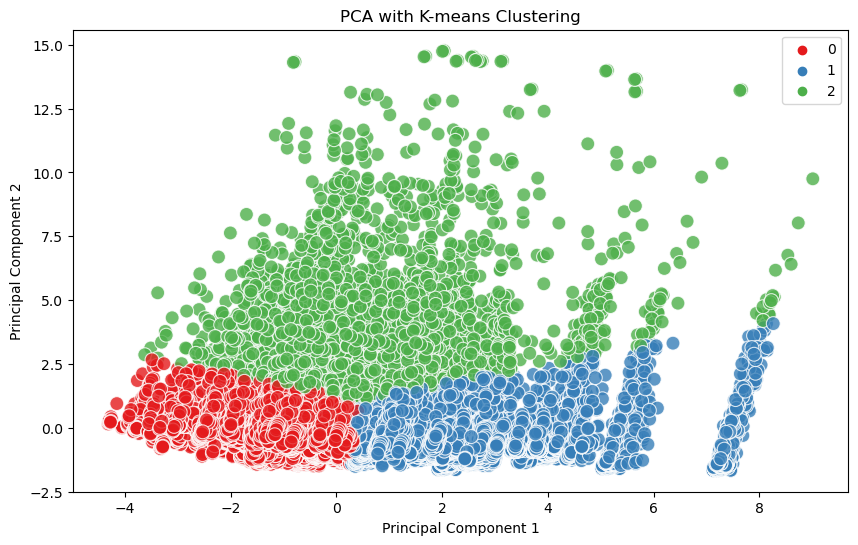

Cluster Means:
         chapter_number_x       EOC  n_possible  n_correct   n_attempt  \
Cluster                                                                  
0                7.432845  0.657862   73.977149  47.137851  101.096238   
1                4.884979  0.732127  125.865098  90.627042  255.689241   
2                7.308006  0.646819   94.741770  60.324072  156.821306   

         chapter_number_y  section_number  tried_again_clicks       engaged  \
Cluster                                                                       
0                6.260756        6.541976            2.090760  3.181742e+05   
1                6.726002        6.235976            2.813095  3.877009e+05   
2                7.121412        6.448249            2.425336  1.539672e+06   

            idle_brief      idle_long  off_page_brief  off_page_long  
Cluster                                                               
0         52611.467415   55823.247315    46334.063193   7.574332e+05  
1    

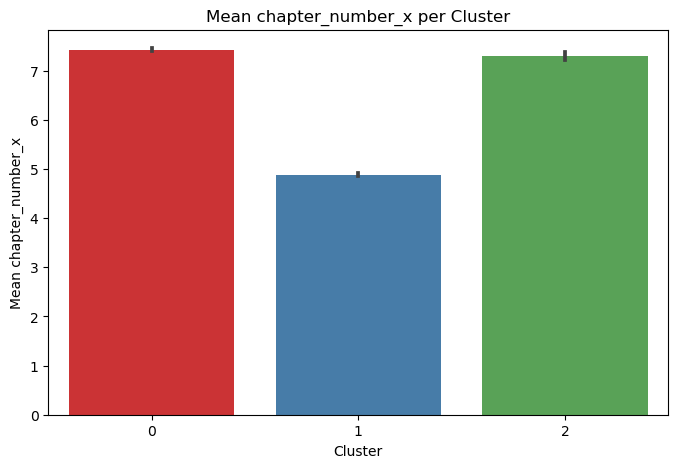

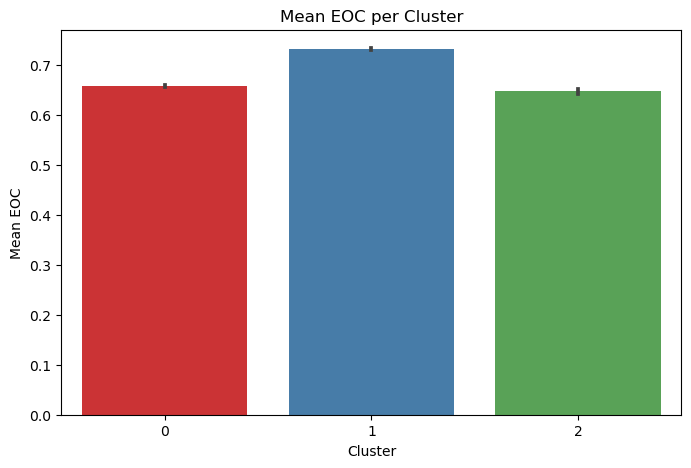

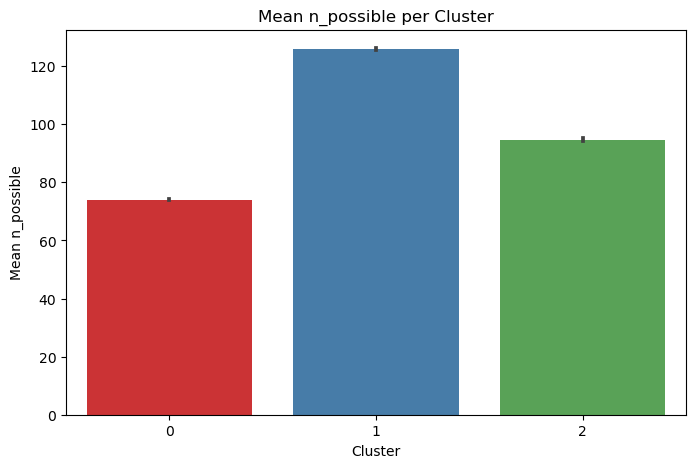

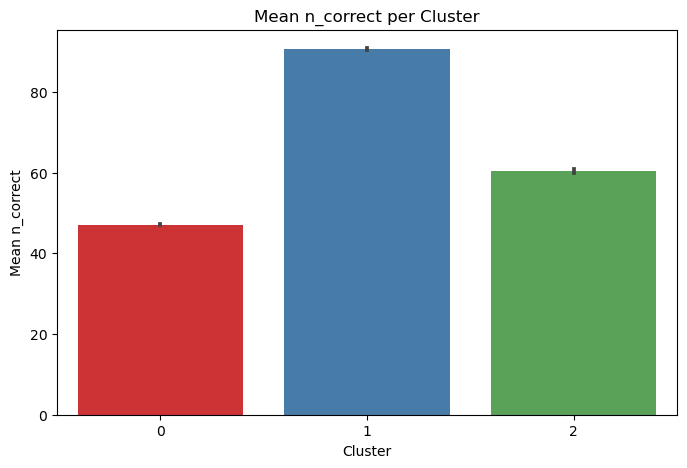

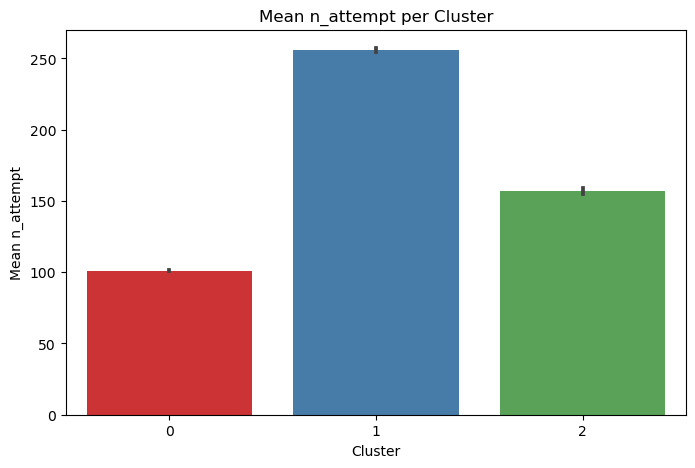

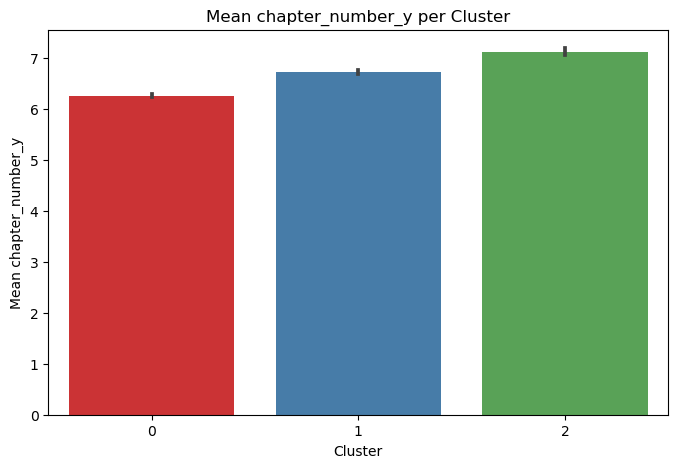

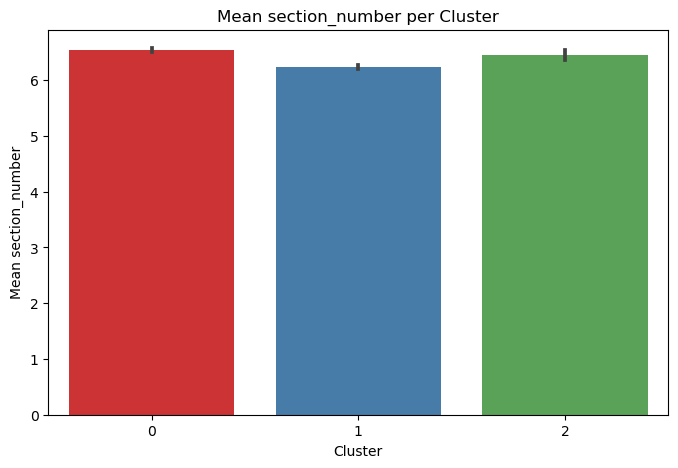

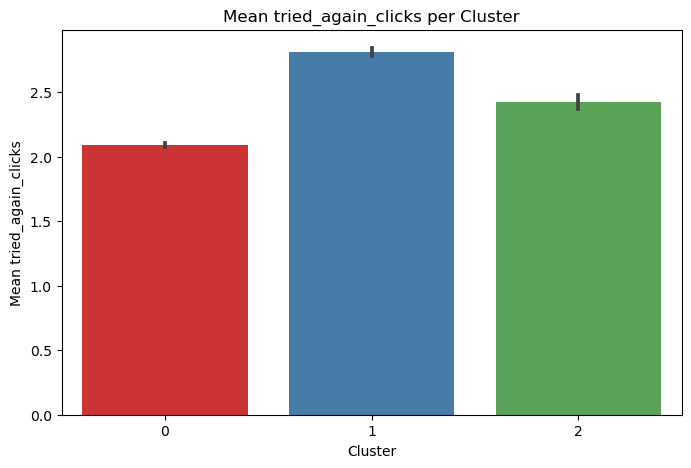

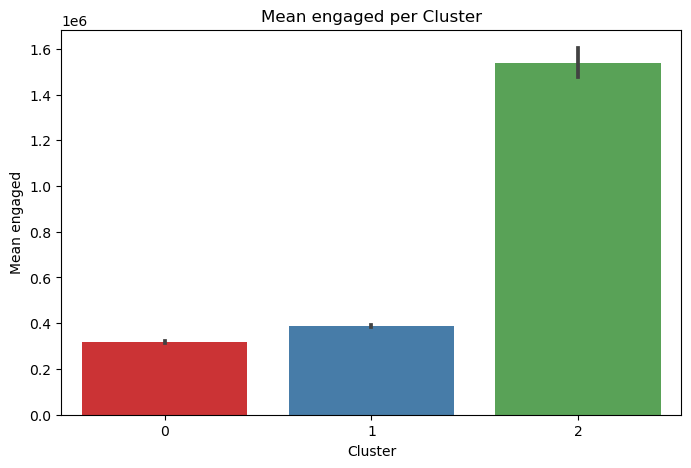

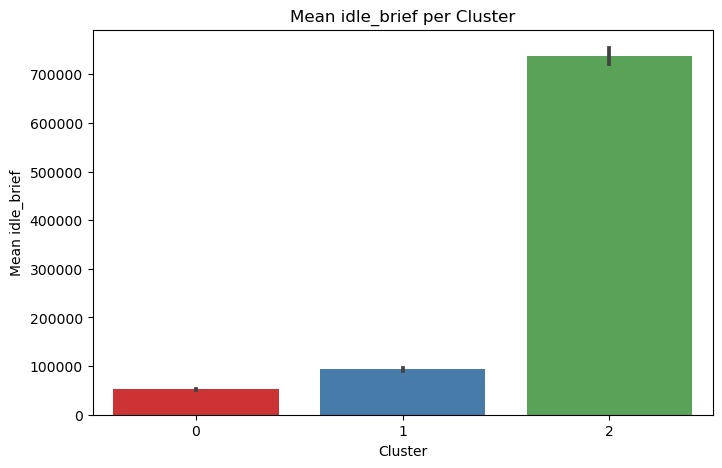

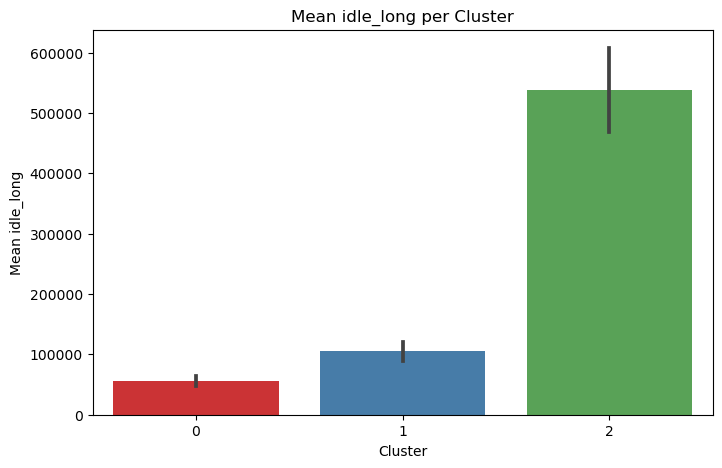

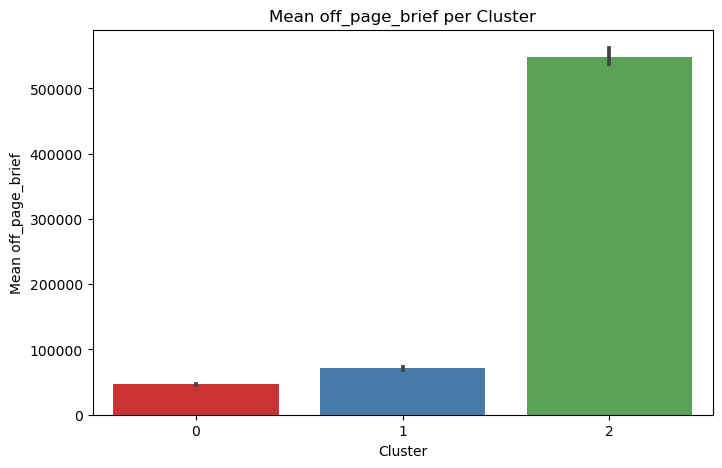

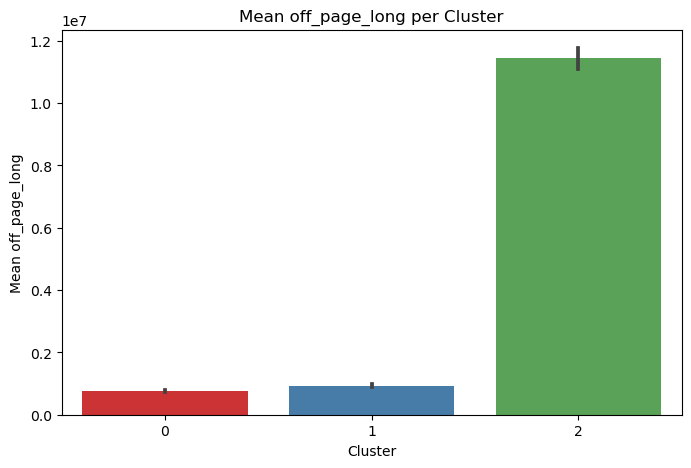

In [2]:
# Select Numeric Columns, standardize data and apply PCA
numeric_columns = data_cleaned.select_dtypes(include=[np.number]).columns
X = data_cleaned[numeric_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

# Cluster Analysis (using K-means clustering)
kmeans = KMeans(n_clusters=3, random_state=42)  
clusters = kmeans.fit_predict(X_pca)
data_clustered = data_cleaned.copy()
data_clustered['Cluster'] = clusters

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data_clustered['Cluster'], palette='Set1', s=100, alpha=0.8)
plt.title('PCA with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.show()

# Analyze clusters and identify critical areas requiring attention
numeric_cluster_means = data_clustered.groupby('Cluster')[numeric_columns].mean()
print("Cluster Means:")
print(numeric_cluster_means)
print(data_clustered.head())

# Visualize the clusters
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x='Cluster', y=col, data=data_clustered, palette='Set1')
    plt.title(f'Mean {col} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Mean {col}')
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Random Forest ML Model

X = data_cleaned.drop(columns=['EOC'])
y = data_cleaned['EOC']
X = X.select_dtypes(include=[np.number])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Fine-tune model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

#Calculate MSE and R^2
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_mse = mean_squared_error(y_test, y_pred_best)
best_r2 = r2_score(y_test, y_pred_best)
print(f'Best Mean Squared Error: {best_mse}')
print(f'Best R^2 Score: {best_r2}')


Mean Squared Error: 8.262443722059794e-07
R^2 Score: 0.9999726390999518
Fitting 5 folds for each of 108 candidates, totalling 540 fits
